In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
# Prepare/ load data
df = pd.read_csv('housingdata.csv', names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
                                          "DIS", "RAD", "TAX", "PTRATIO", "B1000", "LSTAT",
                                          "MEDV"])

# Creating a linear regression model object
lr = lm.LinearRegression()

"""
x1= df[["RM"]]  # independent
x2= df[["LSTAT"]]  # independent
y= df["MEDV"]  # dependent
"""

# Dividing/ picking out the independent variables we wish to obesrve
x1= df.RM[:, np.newaxis]
x2= df.LSTAT[:, np.newaxis]
x3= df.ZN[:, np.newaxis]
x4= df.AGE[:, np.newaxis]
y= df.MEDV.values  # dependent variable we are observing

#plt.pyplot.ylabel("Median Value (in $1000s)")
#plt.pyplot.plot(y, "ro")

#x1 = x1.to_numpy()
#x2 = x2.to_numpy()

#x_with_bias = np.ones((len(x), 2))
#x_with_bias[:] = x

# Applying analytical solution
#psuedo_inverse = np.linalg.inv(np.matmul(x_with_bias.T, x_with_bias))
#thetas = np.matmul(psuedo_inverse, x_with_bias.T)
#thetas = np.matmul(thetas, y)
#norm_y = thetas[1] * x + thetas[0]

#print(psuedo_inverse)

#plt.pyplot.plot(norm_y, "-g")

# Build our linear combo of features
#theta1 = df["RM"][np.random.randint(0, len(df["MEDV"]))]

#theta0 = df["LSTAT"][np.random.randint(0, len(df["LSTAT"]))]

#F_of_x = theta1 * df["RM"] + theta0

#plt.pyplot.plot(F_of_x)

#print(np.random.random_integers(0, 12))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before in

# --- X1 predictions ---
Intercept:  -34.67062077643857
Coefficient:  [9.10210898]
Manual Prediction:  15.390978613561437
Prediction function:  [15.39097862]


Text(0.5, 0, 'RM')

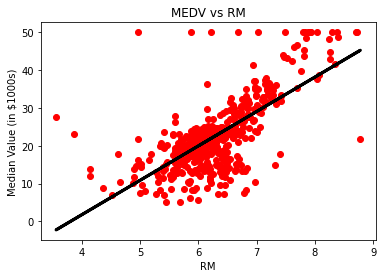

In [3]:
# Fit x1 and y to the model
lr.fit(x1, y)

print("# --- X1 predictions ---")
print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_)
print("Manual Prediction: ", 9.10210898 * 5.5 + -34.67062077643857)

# built-in prediction function
print("Prediction function: ", lr.predict([[5.5]]))

# plot a (new) fitted line
plt.scatter(x1, y, color="red")
plt.plot(x1, lr.predict(x1), color="black", lineWidth=3)
plt.title('MEDV vs RM')
plt.ylabel('Median Value (in $1000s)')
plt.xlabel('RM')

# --- X2 predictions ---
Intercept:  34.5538408793831
Coefficient:  [-0.95004935]
Manual Prediction:  31.7036928293831
Prediction Function:  [31.70369282]


Text(0.5, 0, 'LSTAT')

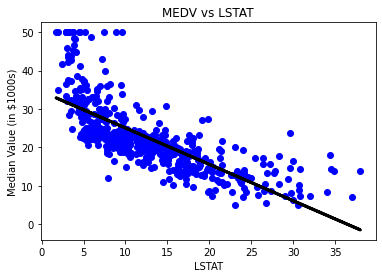

In [4]:
lr.fit(x2, y)

# Manual prediction using m * x + c = Y
# Whereas m = coefficient; x = prediction val; c = intercept
print("# --- X2 predictions ---")
print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_)
print("Manual Prediction: ", -0.95004935 * 3 + 34.5538408793831)

# scikit built-in prediction function
print("Prediction Function: ", lr.predict([[3]]))

# plot fitted line
plt.scatter(x2, y, color="blue")
plt.plot(x2, lr.predict(x2), color="black", lineWidth="3")
plt.title('MEDV vs LSTAT')
plt.ylabel("Median Value (in $1000s)")
plt.xlabel('LSTAT')

# --- X3 Predictions ---
Intercept:  20.917579117799832
Coefficient:  [0.14213999]
Manual Prediction:  22.62325899779983
Prediction function:  [22.62325905]


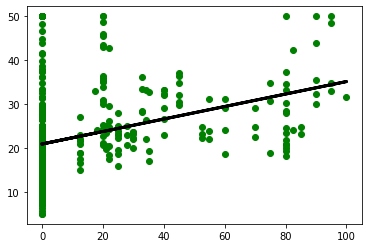

In [5]:
# x3
lr.fit(x3, y)

print("# --- X3 Predictions ---")
print('Intercept: ', lr.intercept_)
print('Coefficient: ', lr.coef_)
#print('Mean of ZN column: ', df['ZN'].mean())
print('Manual Prediction: ', 0.14213999 * 12 + 20.917579117799832)
print("Prediction function: ", lr.predict([[12]]))

# plot fitted line 
plt.scatter(x3, y, color="green")
plt.plot(x3, lr.predict(x3), color="black", lineWidth=3)

# --- X4 Predictions ---
Coefficient:  [-0.12316272]
Intercept:  30.97867776261804
Manual Prediction:  22.60361280261804
Prediction Function:  [22.60361272]


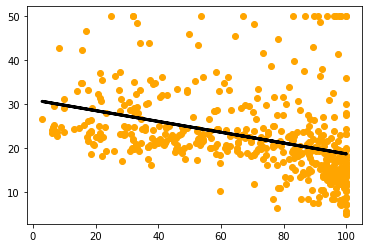

In [6]:
print('# --- X4 Predictions ---')

# fit the data
lr.fit(x4, y)

# Find coefficient and intercept
print('Coefficient: ', lr.coef_)
print('Intercept: ', lr.intercept_)
#print('Mean of AGE: ', df['AGE'].mean())
print('Manual Prediction: ', -0.12316272 * 68 + 30.97867776261804)
print('Prediction Function: ', lr.predict([[68]]))

plt.scatter(x4, y, color='orange')
plt.plot(x4, lr.predict(x4), color='black', lineWidth=3)


In [7]:
# A multivariate observation thus follows this form:
# b1 * x1 + b2 * x2 + .. bn * xn + b0 = Y
# whereas
# bn --> coefficient of nth feature
# xn --> nth feature
# b0 --> y-intercept

# Create an array of features and a var containing our target (dependent var)
features = ["CHAS", "RM", "AGE",
            "DIS", "RAD", "TAX", "PTRATIO", "B1000", "LSTAT"]
target = 'MEDV'

# Creating another linear regression model object
lr2 = lm.LinearRegression()

# Turn all variables into pandas dataframes
df_x = df[features].values.reshape(-1, len(features))
df_y = df[target].values

# split our data in training and testing 80/20 respectively
X_test, X_train, y_test, y_train = train_test_split(df_x, df_y, train_size=0.80, random_state=1)

#model = lr2.fit(df_x, df_y)
ordinary_least_squares = sm.OLS(y_train,  X_train).fit()  # performing ordinary least squares
print(ordinary_least_squares.summary(xname=["CHAS", "RM", "AGE",
                                            "DIS", "RAD", "TAX", "PTRATIO", "B1000", "LSTAT"]))

# predictions on the test set
y_train_pred = ordinary_least_squares.predict(X_train)
y_test_pred = ordinary_least_squares.predict(X_test)

# test vs train errors
print('Train Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred))
print('Train Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

print('Test Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Test Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              353.4
Date:                Tue, 06 Apr 2021   Prob (F-statistic):                    7.64e-68
Time:                        02:44:29   Log-Likelihood:                         -290.07
No. Observations:                 102   AIC:                                      598.1
Df Residuals:                      93   BIC:                                      621.8
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Some important values from the Regression Results


*   **Adjusted R-squared**: The more independent variables we have, the higher regular R-squared becomes
*   **Durbin-Watson**: This value determines the presence/existence of colinearity in our model. Colinearity occurs when one independent variable has a strong correlation with another independent variable. Values close to 2 are most desirable
*   **p value**: a p value >= 0.05 indicates insignificance in our model (weak evidence against our null hypothesis)

The following features were removed from the OLS due to a high p-value: CRIM, INDUS, ZN and NOX








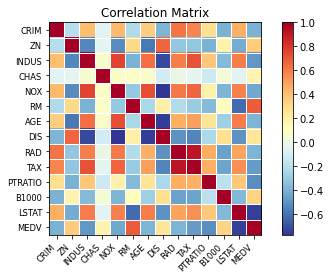

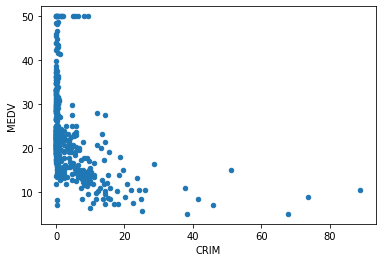

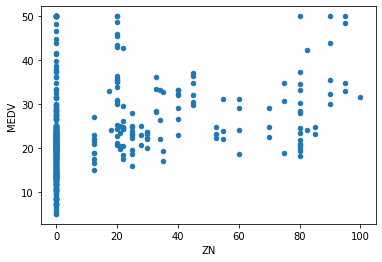

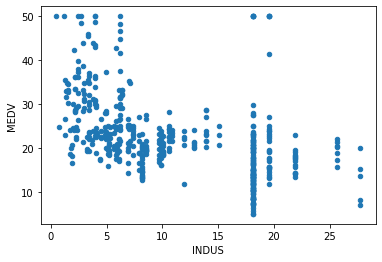

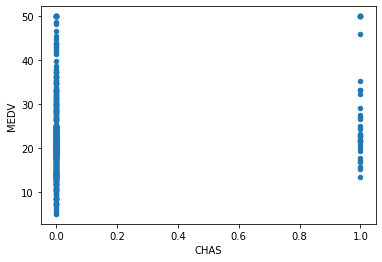

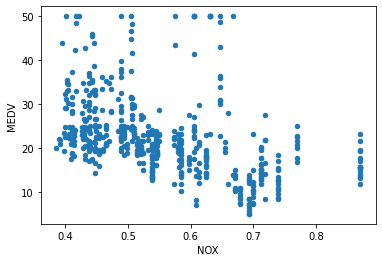

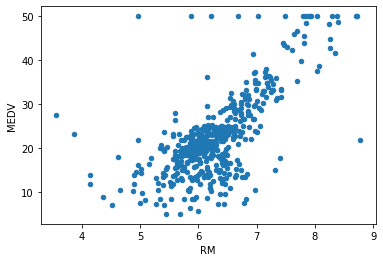

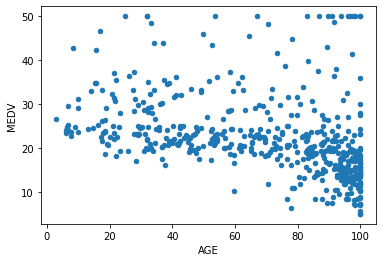

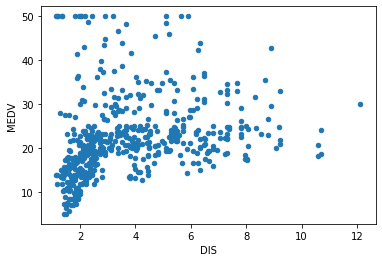

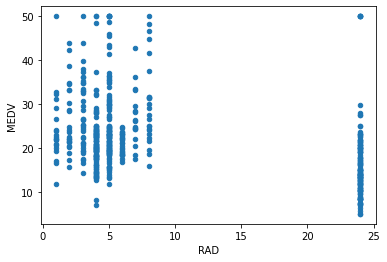

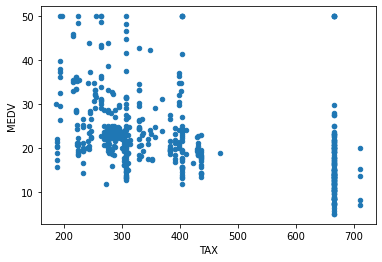

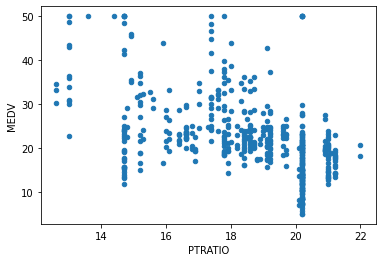

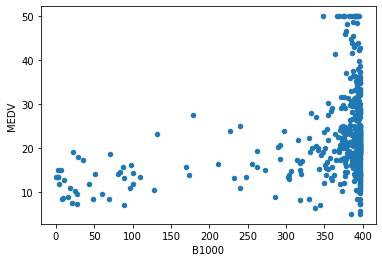

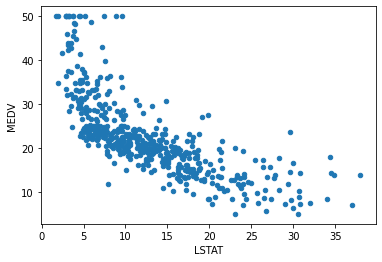

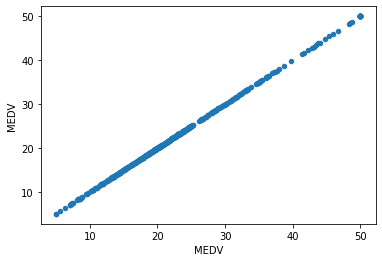

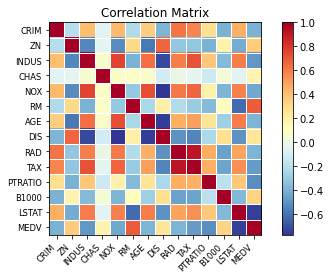

In [8]:
 # Use this cell to find correlation and print all of the plots to find data we would like to use
#print(df.corr())

for data in df:
  df.plot(kind="scatter", x=data, y="MEDV")

corr = df.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))